# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [132]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [223]:
# Importing the file porter_data_1.csv
porter_df=pd.read_csv("/Users/noopur.nigam/ML and AI executive Program/porter_data_1.csv")
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [229]:
print(porter_df.head())

porter_df['created_at'] = pd.to_datetime(porter_df['created_at'])
porter_df['actual_delivery_time'] = pd.to_datetime(porter_df['actual_delivery_time'])

print(porter_df.dtypes)

porter_df['time_taken'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

porter_df['order_hour'] = porter_df['created_at'].dt.hour  # Hour of order placement
porter_df['order_day_of_week'] = porter_df['created_at'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
porter_df['is_weekend'] = porter_df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend indicator

print(porter_df.head())

   market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [233]:
# Convert categorical features to category type

categorical_columns = ['store_primary_category', 'order_protocol'] 

for column in categorical_columns:
    porter_df[column] = pd.Categorical(porter_df[column])

print(porter_df.head())


   market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [235]:
# Calculate time taken in minutes
porter_df['created_at'] = pd.to_datetime(porter_df['created_at'])
porter_df['actual_delivery_time'] = pd.to_datetime(porter_df['actual_delivery_time'])
porter_df['time_taken'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

porter_df['order_hour'] = porter_df['created_at'].dt.hour  # Hour of order placement
porter_df['order_day_of_week'] = porter_df['created_at'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
porter_df['is_weekend'] = porter_df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend indicator

print(porter_df.head())


   market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  to

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [237]:
# Extract the hour and day of week from the 'created_at' timestamp

porter_df['created_at'] = pd.to_datetime(porter_df['created_at'])

# Extract the hour and day of the week when the order was placed
porter_df['order_hour'] = porter_df['created_at'].dt.hour  # Hour of order placement
porter_df['order_day_of_week'] = porter_df['created_at'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)

# Create a categorical feature 'is_weekend'
porter_df['is_weekend'] = porter_df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

print(porter_df.head())

   market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  to

In [56]:
# Drop unnecessary columns
porter_df = porter_df.drop(columns=['store_primary_category'], errors='ignore')
print(porter_df.head())


   market_id          created_at actual_delivery_time order_protocol  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17            1.0   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25            2.0   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35            3.0   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46            1.0   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36            1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            4      4771                   3             820            1604   
3            1      1525                   1            1525            1525   
4            2      3620                   2            1425            2195   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0           

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [243]:
# Define target variable (y) and features (X)

X = porter_df[["market_id", "order_protocol", "total_items", 
        "subtotal", "num_distinct_items", "min_item_price", "max_item_price", 
        "total_onshift_dashers", "total_busy_dashers", "total_outstanding_orders", 
        "distance"]]

y = (pd.to_datetime(porter_df['actual_delivery_time']) - pd.to_datetime(porter_df['created_at'])).dt.total_seconds()



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [245]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


# Define numerical and categorical columns for easy EDA and data manipulation
Numerical Columns:
* market_id
* total_items
* subtotal
* num_distinct_items
* min_item_price
* max_item_price
* total_onshift_dashers
* total_busy_dashers
* total_outstanding_orders
* distance

Categorical Columns:
* store_primary_category
* order_protocol

Datetime Columns:
* created_at
* actual_delivery_time


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

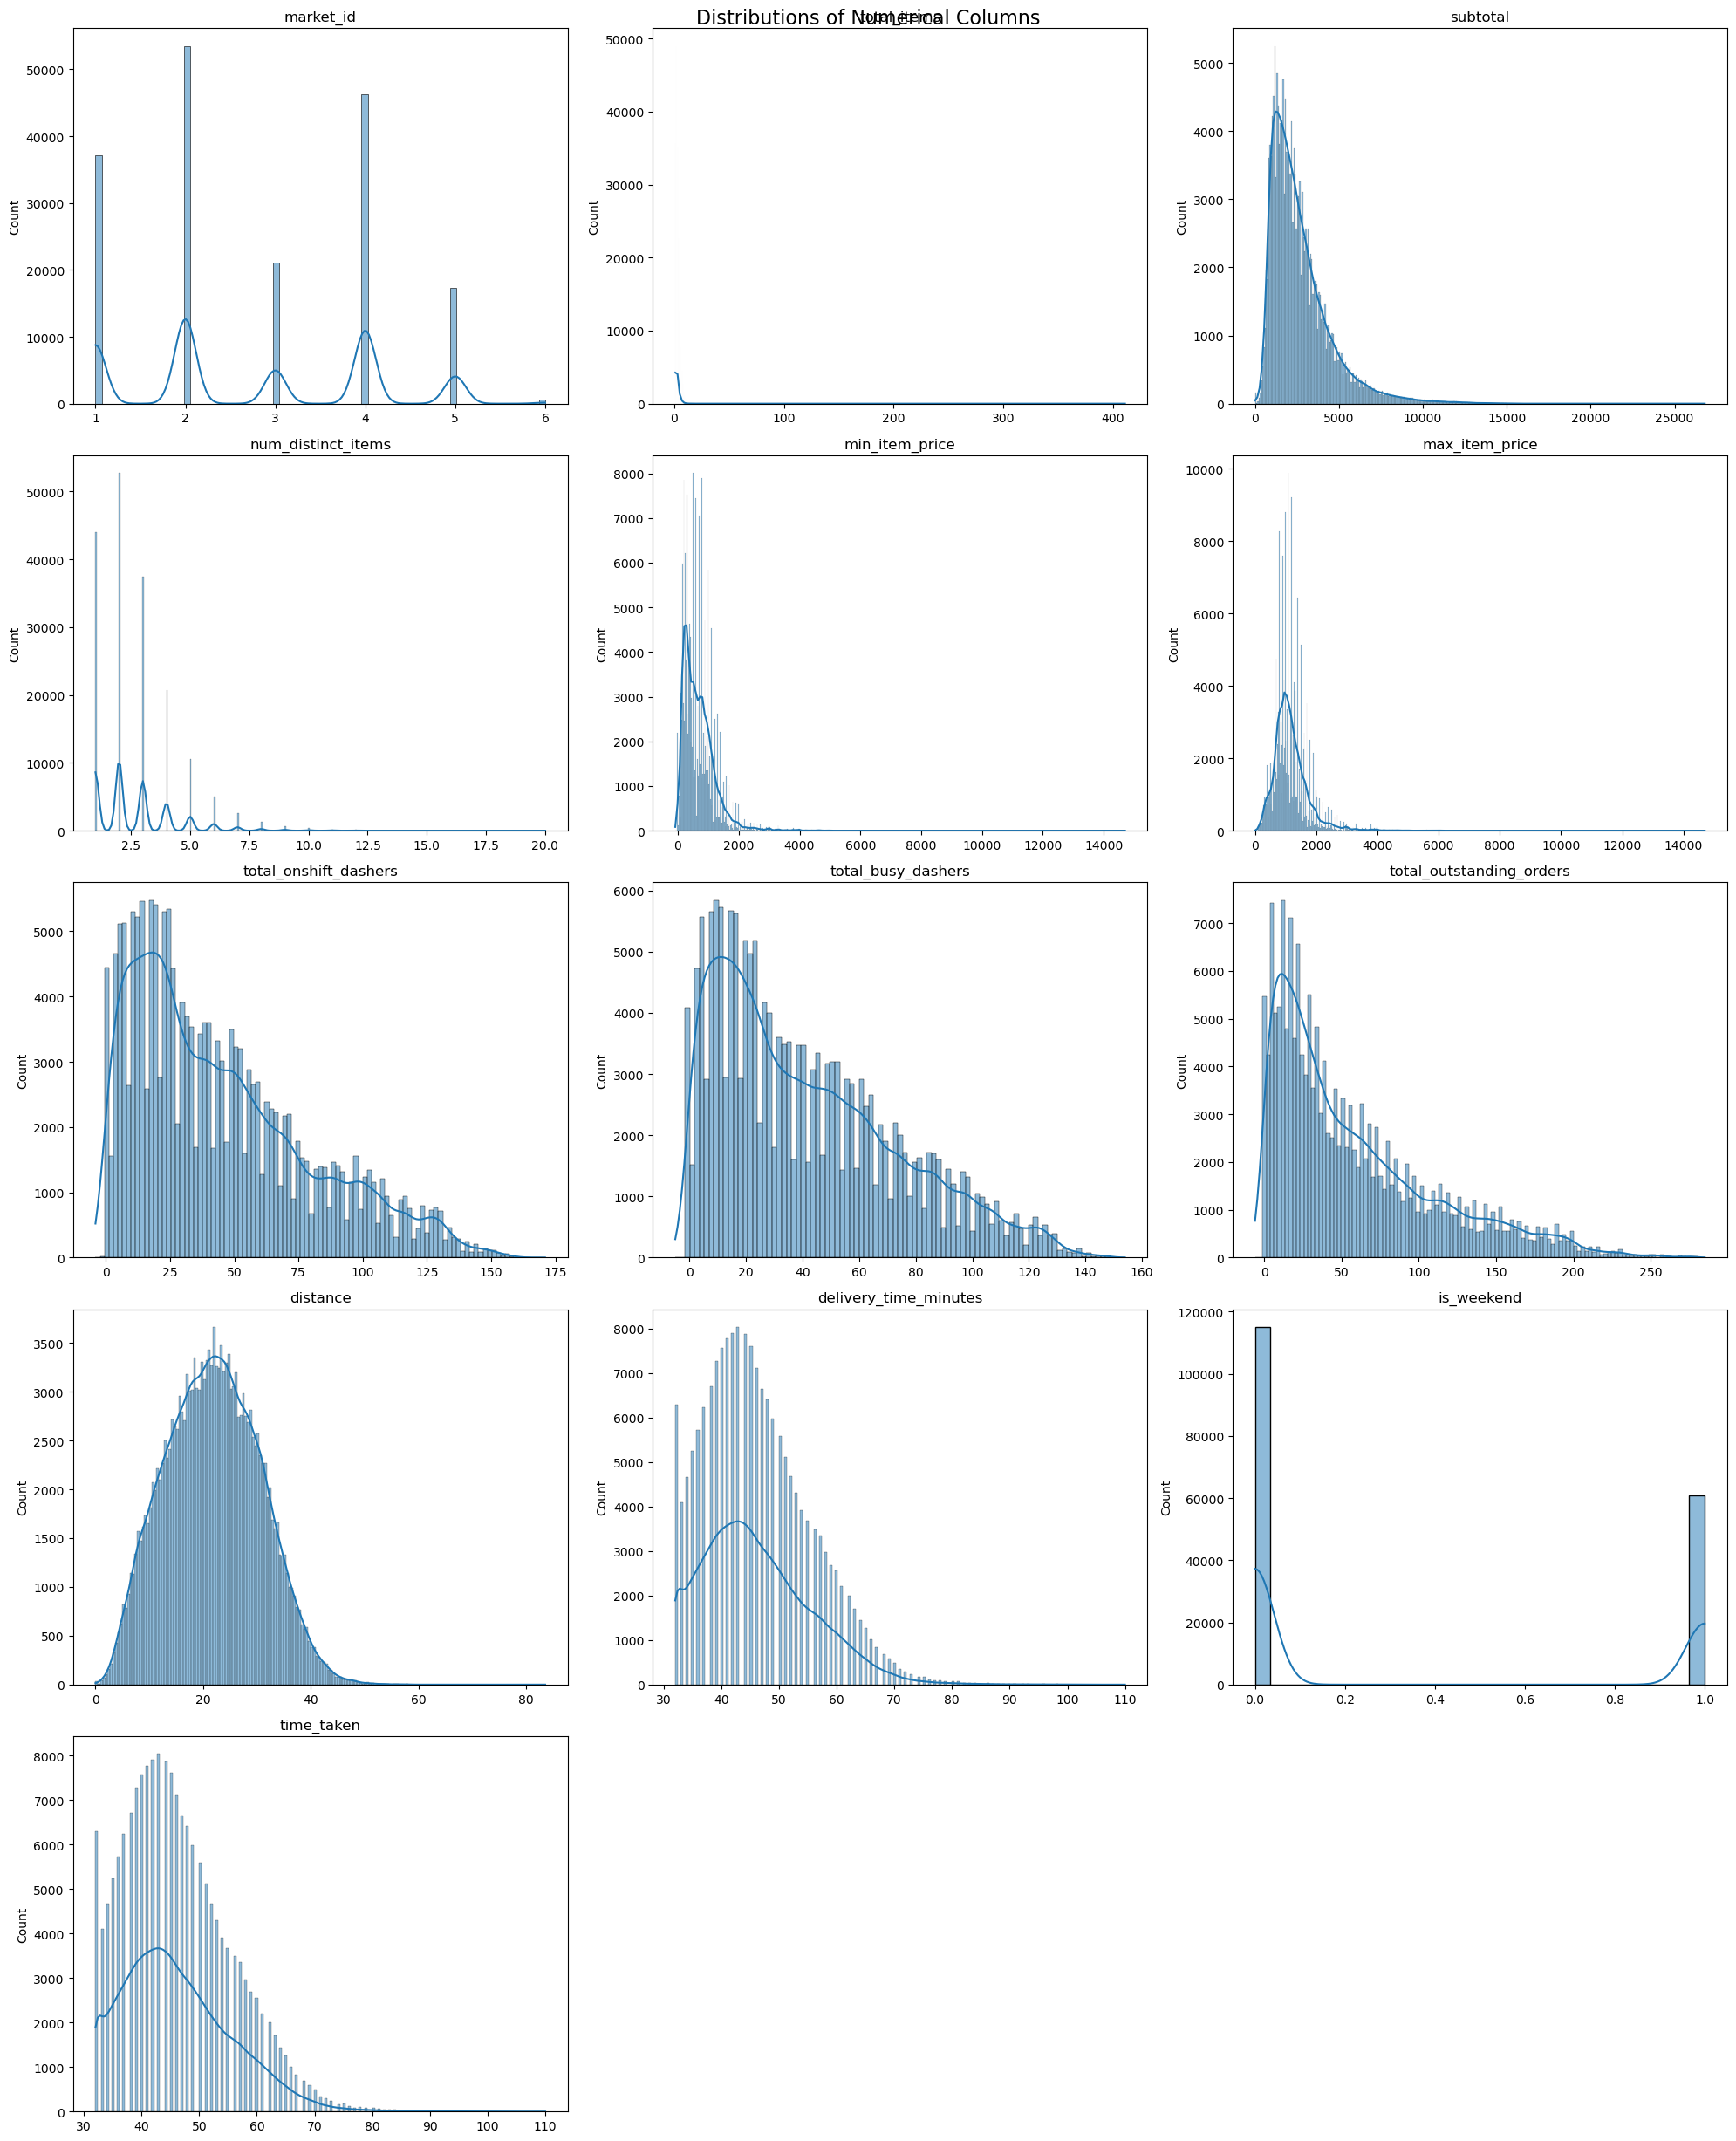

In [248]:
numerical_columns = porter_df.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot
n_cols = 3
n_rows = (len(numerical_columns) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Distributions of Numerical Columns', fontsize=16)

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    ax = axes[i // n_cols, i % n_cols]
    sns.histplot(porter_df[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

# Remove empty subplots
for i in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

/var/folders/zx/ddt9vhvn24zcwr94ds7ytwm80000gp/T/ipykernel_62180/821983303.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=porter_df, x='store_primary_category', palette='viridis')
/var/folders/zx/ddt9vhvn24zcwr94ds7ytwm80000gp/T/ipykernel_62180/821983303.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=porter_df, x='order_protocol', palette='coolwarm')


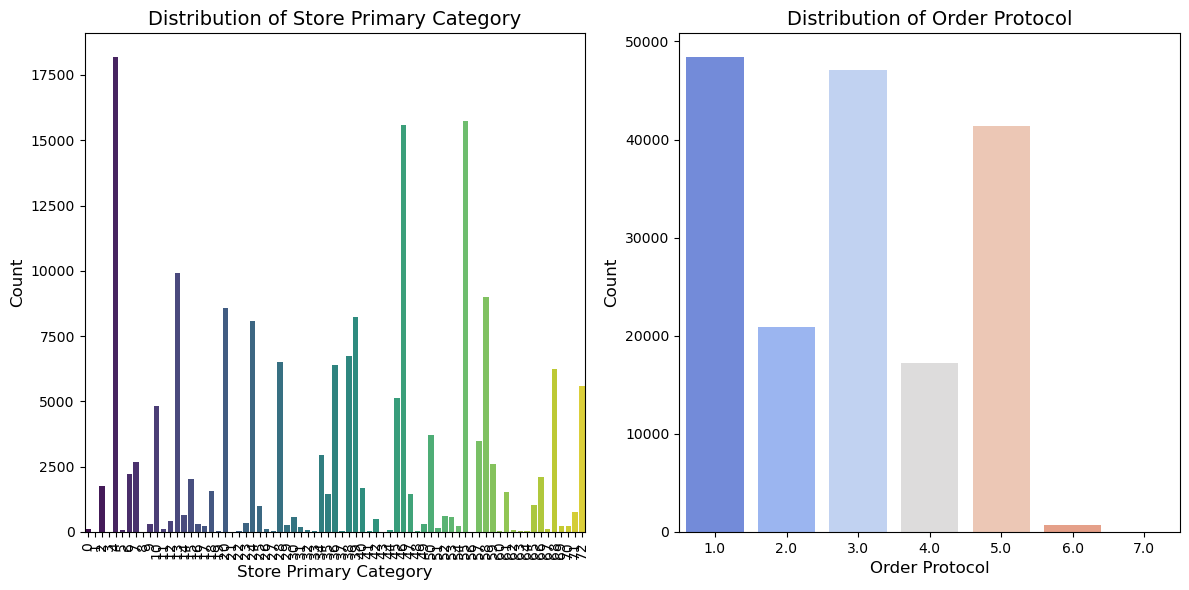

In [250]:
# Distribution of categorical columns
categorical_columns = ['store_primary_category', 'order_protocol']

# Set up the plot dimensions
plt.figure(figsize=(12, 6))

# Plot distribution for 'store_primary_category'
plt.subplot(1, 2, 1)
sns.countplot(data=porter_df, x='store_primary_category', palette='viridis')
plt.title('Distribution of Store Primary Category', fontsize=14)
plt.xlabel('Store Primary Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)

# Plot distribution for 'order_protocol'
plt.subplot(1, 2, 2)
sns.countplot(data=porter_df, x='order_protocol', palette='coolwarm')
plt.title('Distribution of Order Protocol', fontsize=14)
plt.xlabel('Order Protocol', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

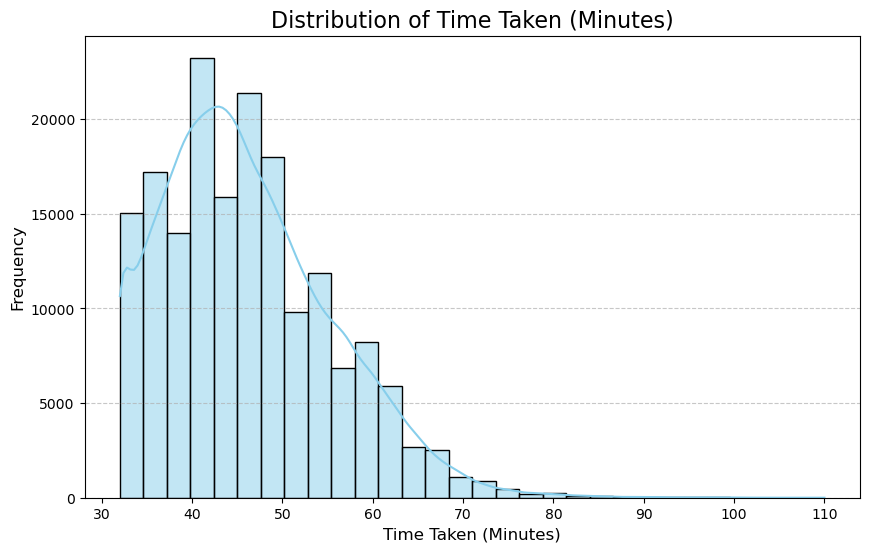

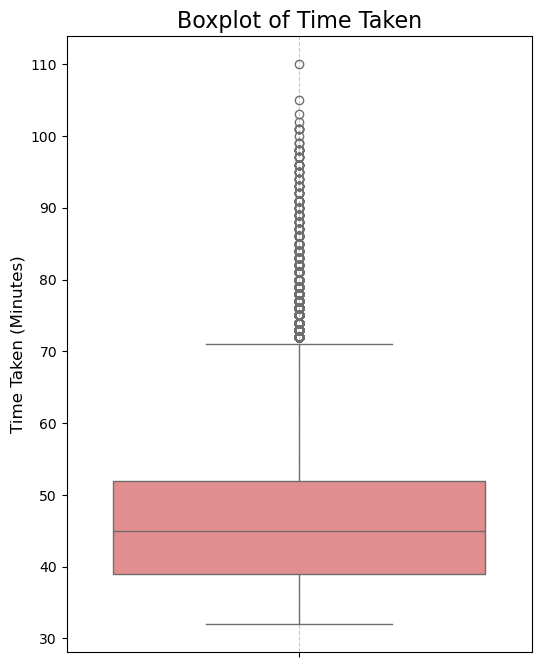

In [252]:
# Distribution of time_taken


porter_df['time_taken'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.histplot(porter_df['time_taken'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Time Taken (Minutes)', fontsize=16)
plt.xlabel('Time Taken (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot a boxplot to further understand the spread and potential skewness
plt.figure(figsize=(6, 8))
sns.boxplot(y=porter_df['time_taken'], color='lightcoral')
plt.title('Boxplot of Time Taken', fontsize=16)
plt.ylabel('Time Taken (Minutes)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

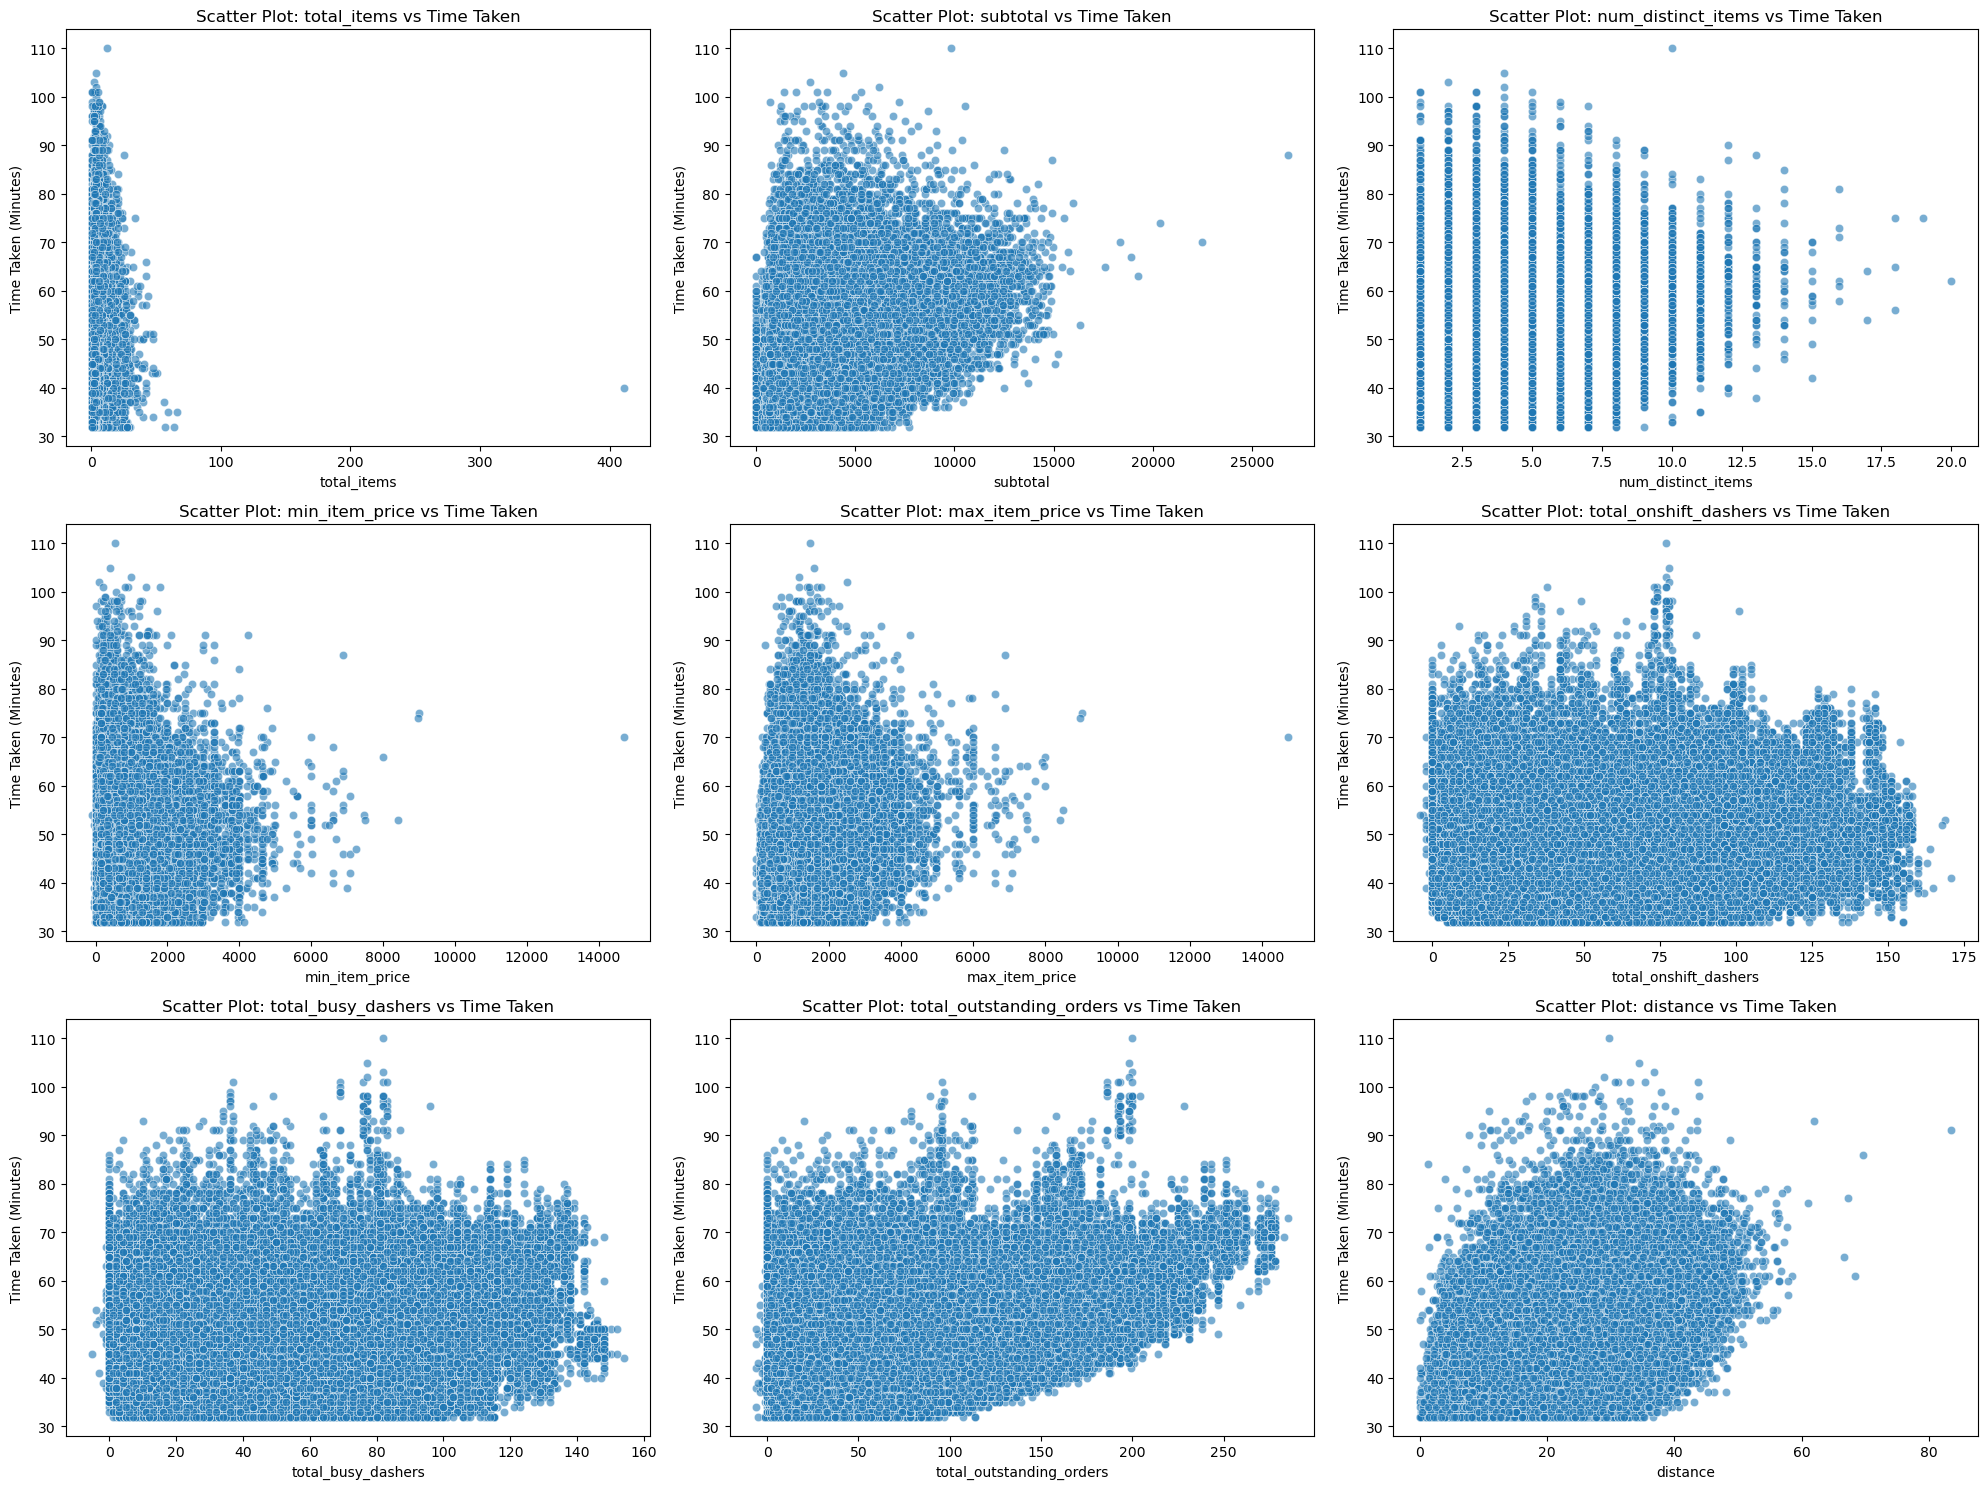

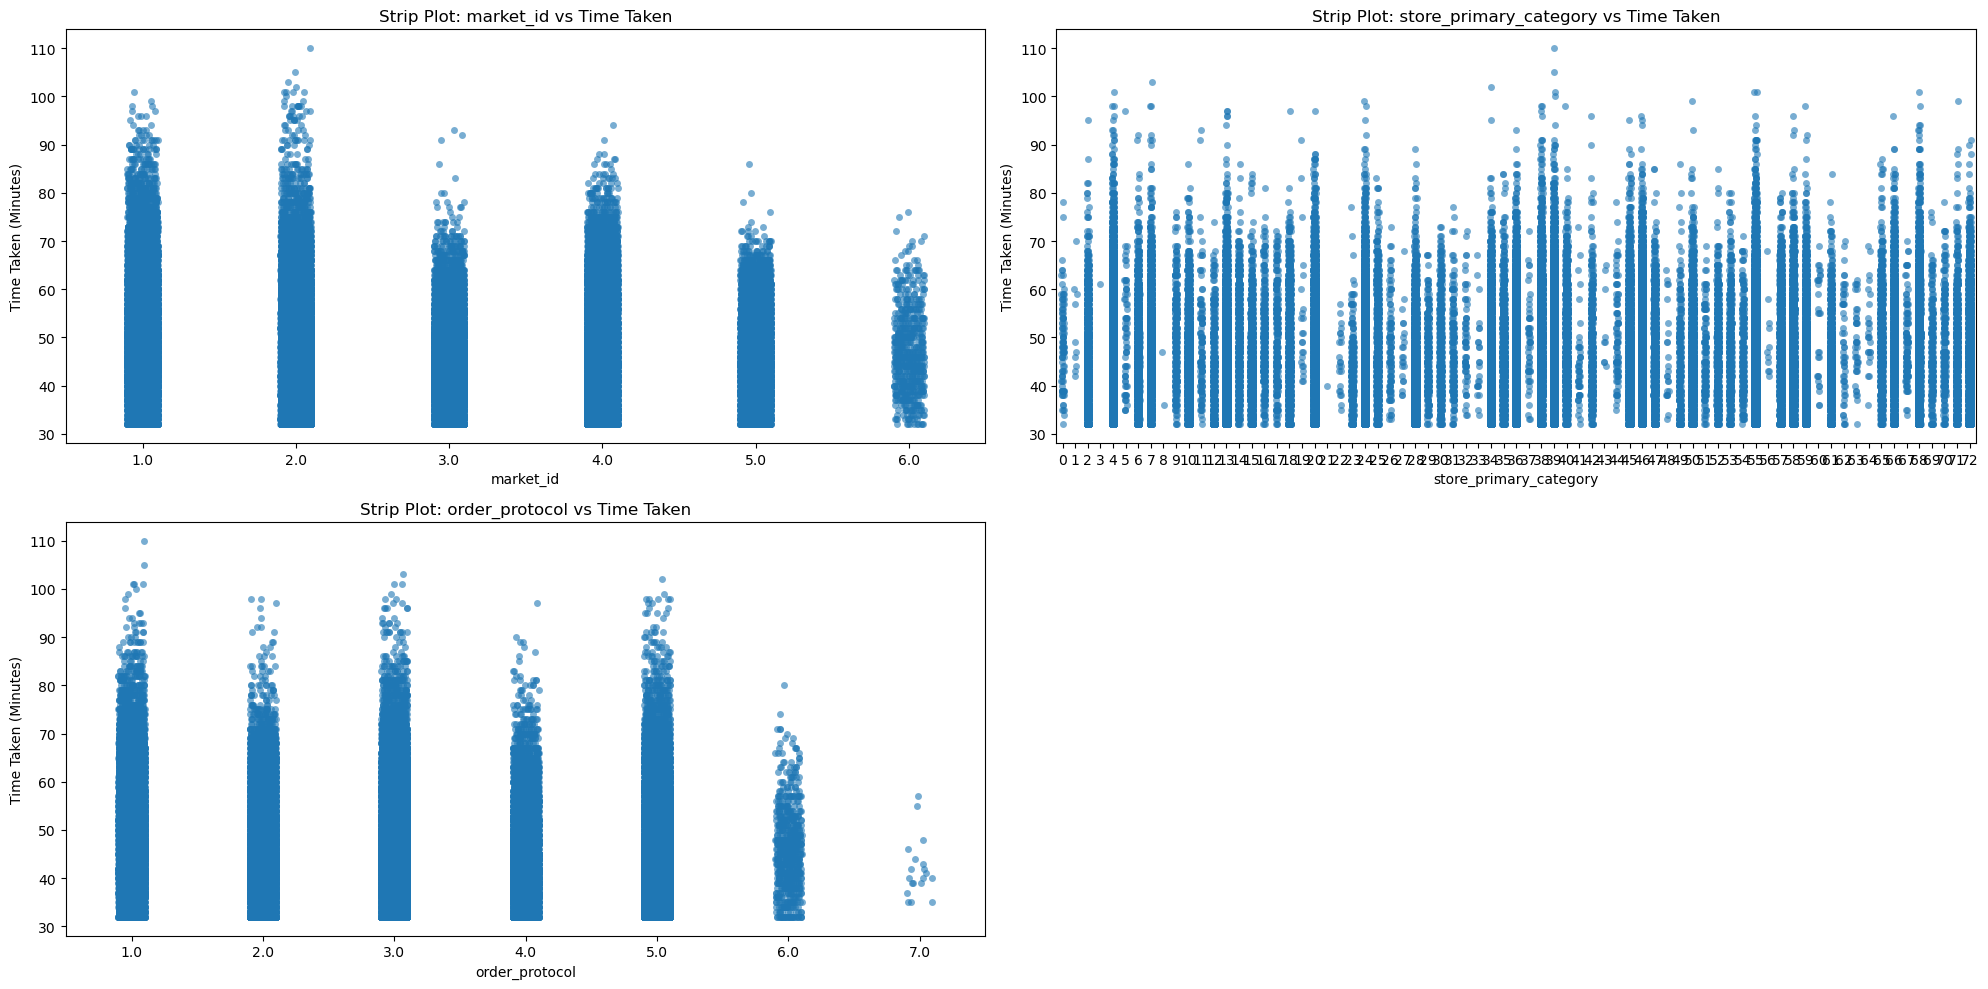

In [254]:
# Numerical features for scatter plots
numerical_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 
                      'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 
                      'total_outstanding_orders', 'distance']

# Categorical features for scatter plots
categorical_features = ['market_id', 'store_primary_category', 'order_protocol']

# Plot scatter plots for numerical features against time_taken
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=porter_df, x=feature, y='time_taken', alpha=0.6)
    plt.title(f'Scatter Plot: {feature} vs Time Taken')
    plt.xlabel(feature)
    plt.ylabel('Time Taken (Minutes)')
plt.tight_layout()
plt.show()

# Plot scatter plots for categorical features against time_taken (using jitter for clarity)
plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.stripplot(data=porter_df, x=feature, y='time_taken', jitter=True, alpha=0.6)
    plt.title(f'Strip Plot: {feature} vs Time Taken')
    plt.xlabel(feature)
    plt.ylabel('Time Taken (Minutes)')
plt.tight_layout()
plt.show()


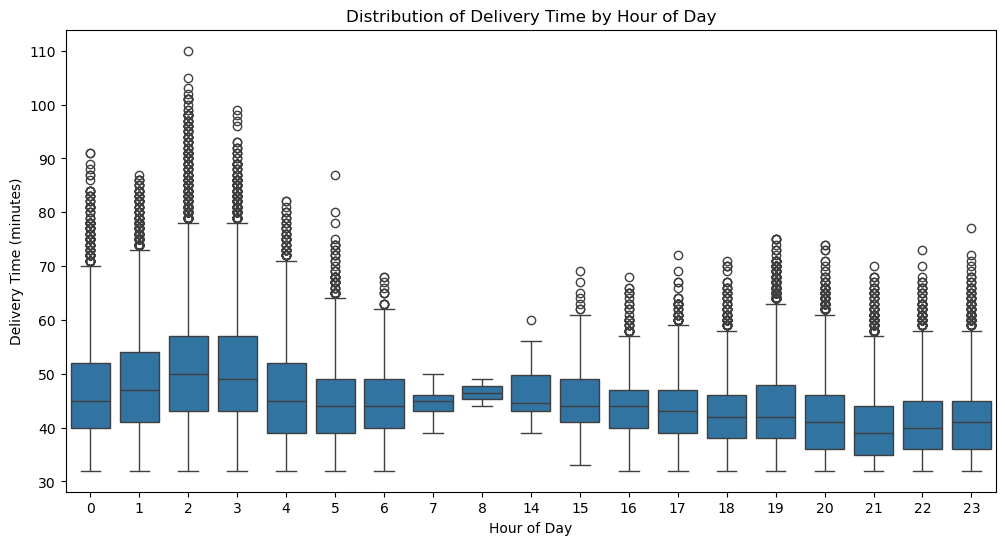

In [256]:
# Calculate time_taken in minutes
porter_df['time_taken'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

# Extract hour from created_at
porter_df['hour'] = porter_df['created_at'].dt.hour

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='time_taken', data=porter_df)
plt.title('Distribution of Delivery Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time (minutes)')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

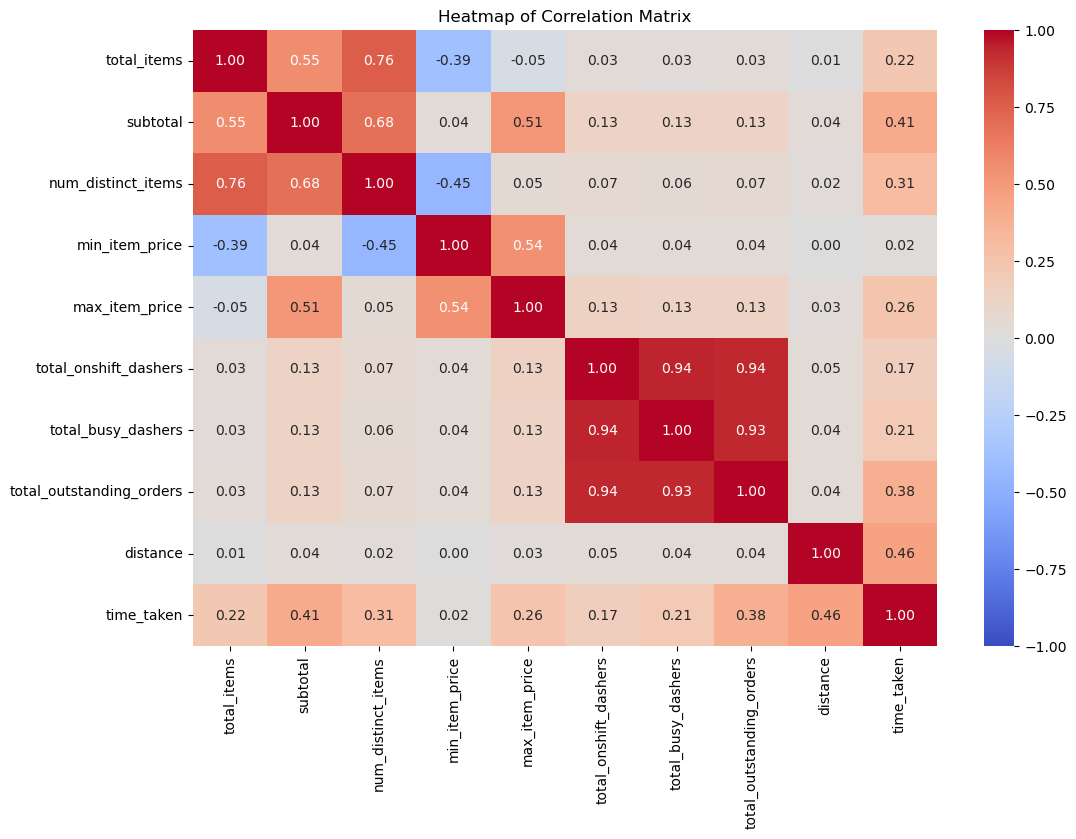

In [258]:
# Plot the heatmap of the correlation matrix
# Calculate time_taken in minutes
porter_df['time_taken'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

# Select numerical features for correlation analysis
numerical_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 
                      'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 
                      'total_outstanding_orders', 'distance', 'time_taken']

# Calculate the correlation matrix
correlation_matrix = porter_df[numerical_features].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [260]:
# Drop 3-5 weakly correlated columns from training dataset
# Select numerical features for correlation analysis
numerical_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 
                      'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 
                      'total_outstanding_orders', 'distance']

# Calculate the correlation matrix
correlation_matrix = porter_df[numerical_features + ['time_taken']].corr()

# Identify columns with weak correlations (absolute correlation < 0.2)
weak_correlation_columns = correlation_matrix['time_taken'][correlation_matrix['time_taken'].abs() < 0.2].index.tolist()

# Drop weakly correlated columns from the dataset
df_dropped = porter_df.drop(columns=weak_correlation_columns)

print("Dropped columns:", weak_correlation_columns)


Dropped columns: ['min_item_price', 'total_onshift_dashers']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

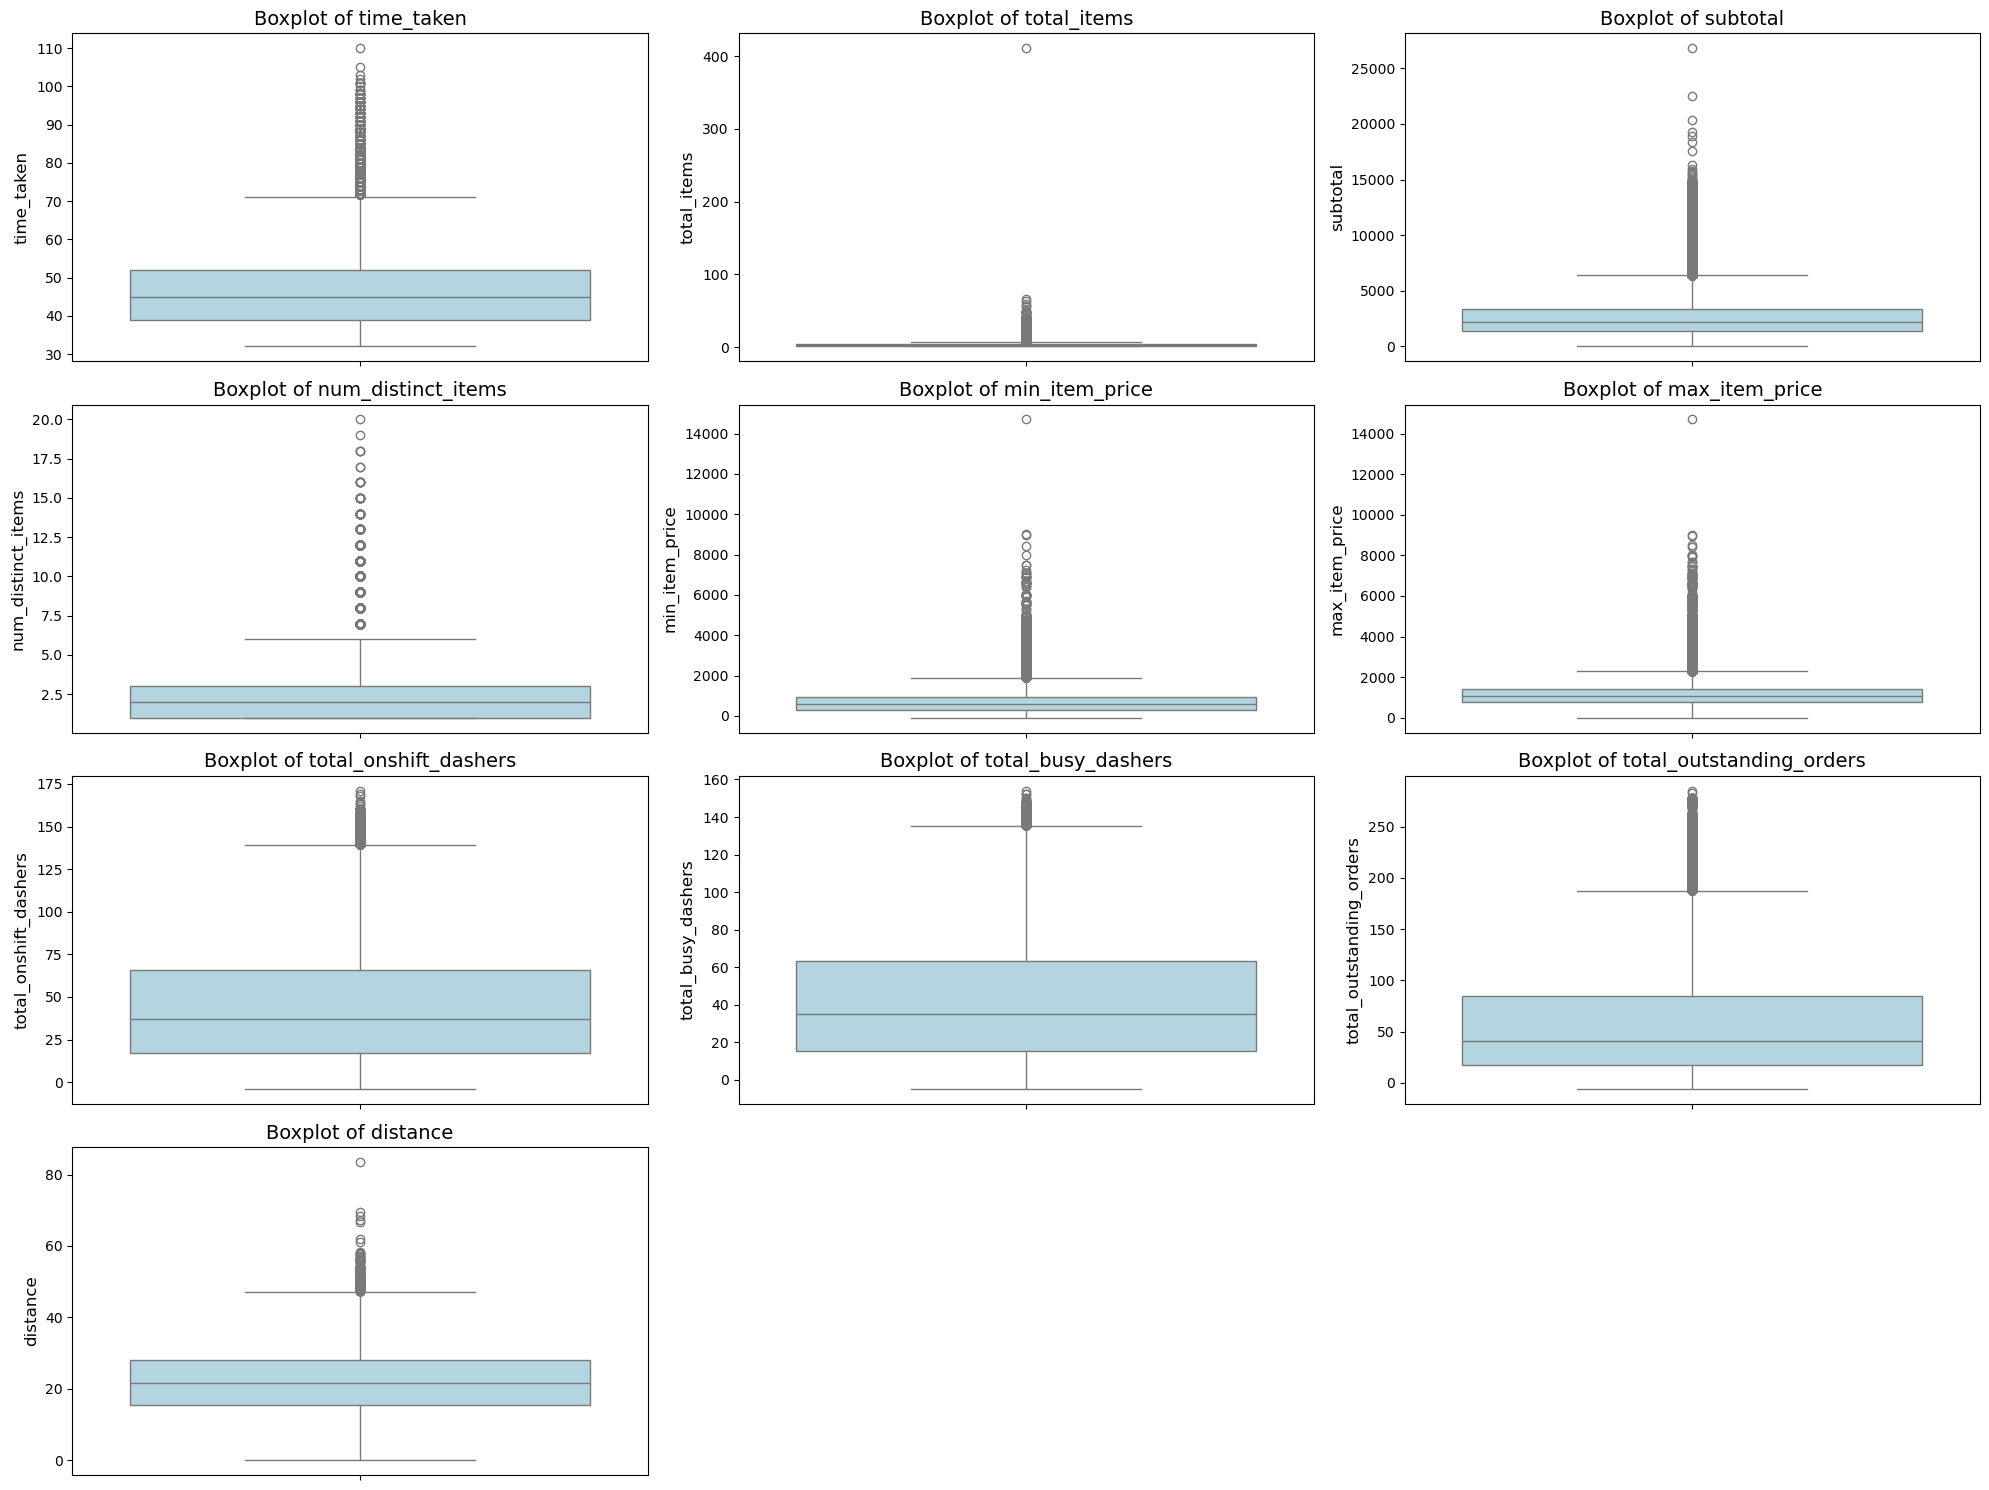

In [262]:
# Boxplot for time_taken

# List of numerical features to visualize
numerical_features = ['time_taken', 'total_items', 'subtotal', 'num_distinct_items',
                      'min_item_price', 'max_item_price', 'total_onshift_dashers',
                      'total_busy_dashers', 'total_outstanding_orders', 'distance']

# Set up the plot dimensions
plt.figure(figsize=(20, 15))

# Plot boxplots for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=porter_df, y=feature, color='lightblue')
    plt.title(f'Boxplot of {feature}', fontsize=14)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [265]:
# List of numerical columns to handle outliers
numerical_columns = ['time_taken', 'total_items', 'subtotal', 'num_distinct_items',
                     'min_item_price', 'max_item_price', 'total_onshift_dashers',
                     'total_busy_dashers', 'total_outstanding_orders', 'distance']

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

# Apply outlier handling to all numerical columns
for column in numerical_columns:
    porter_df = handle_outliers(porter_df, column)

print("Outliers have been handled for all numerical columns.")


Outliers have been handled for all numerical columns.


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [267]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 
                     'min_item_price', 'max_item_price', 'total_onshift_dashers', 
                     'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

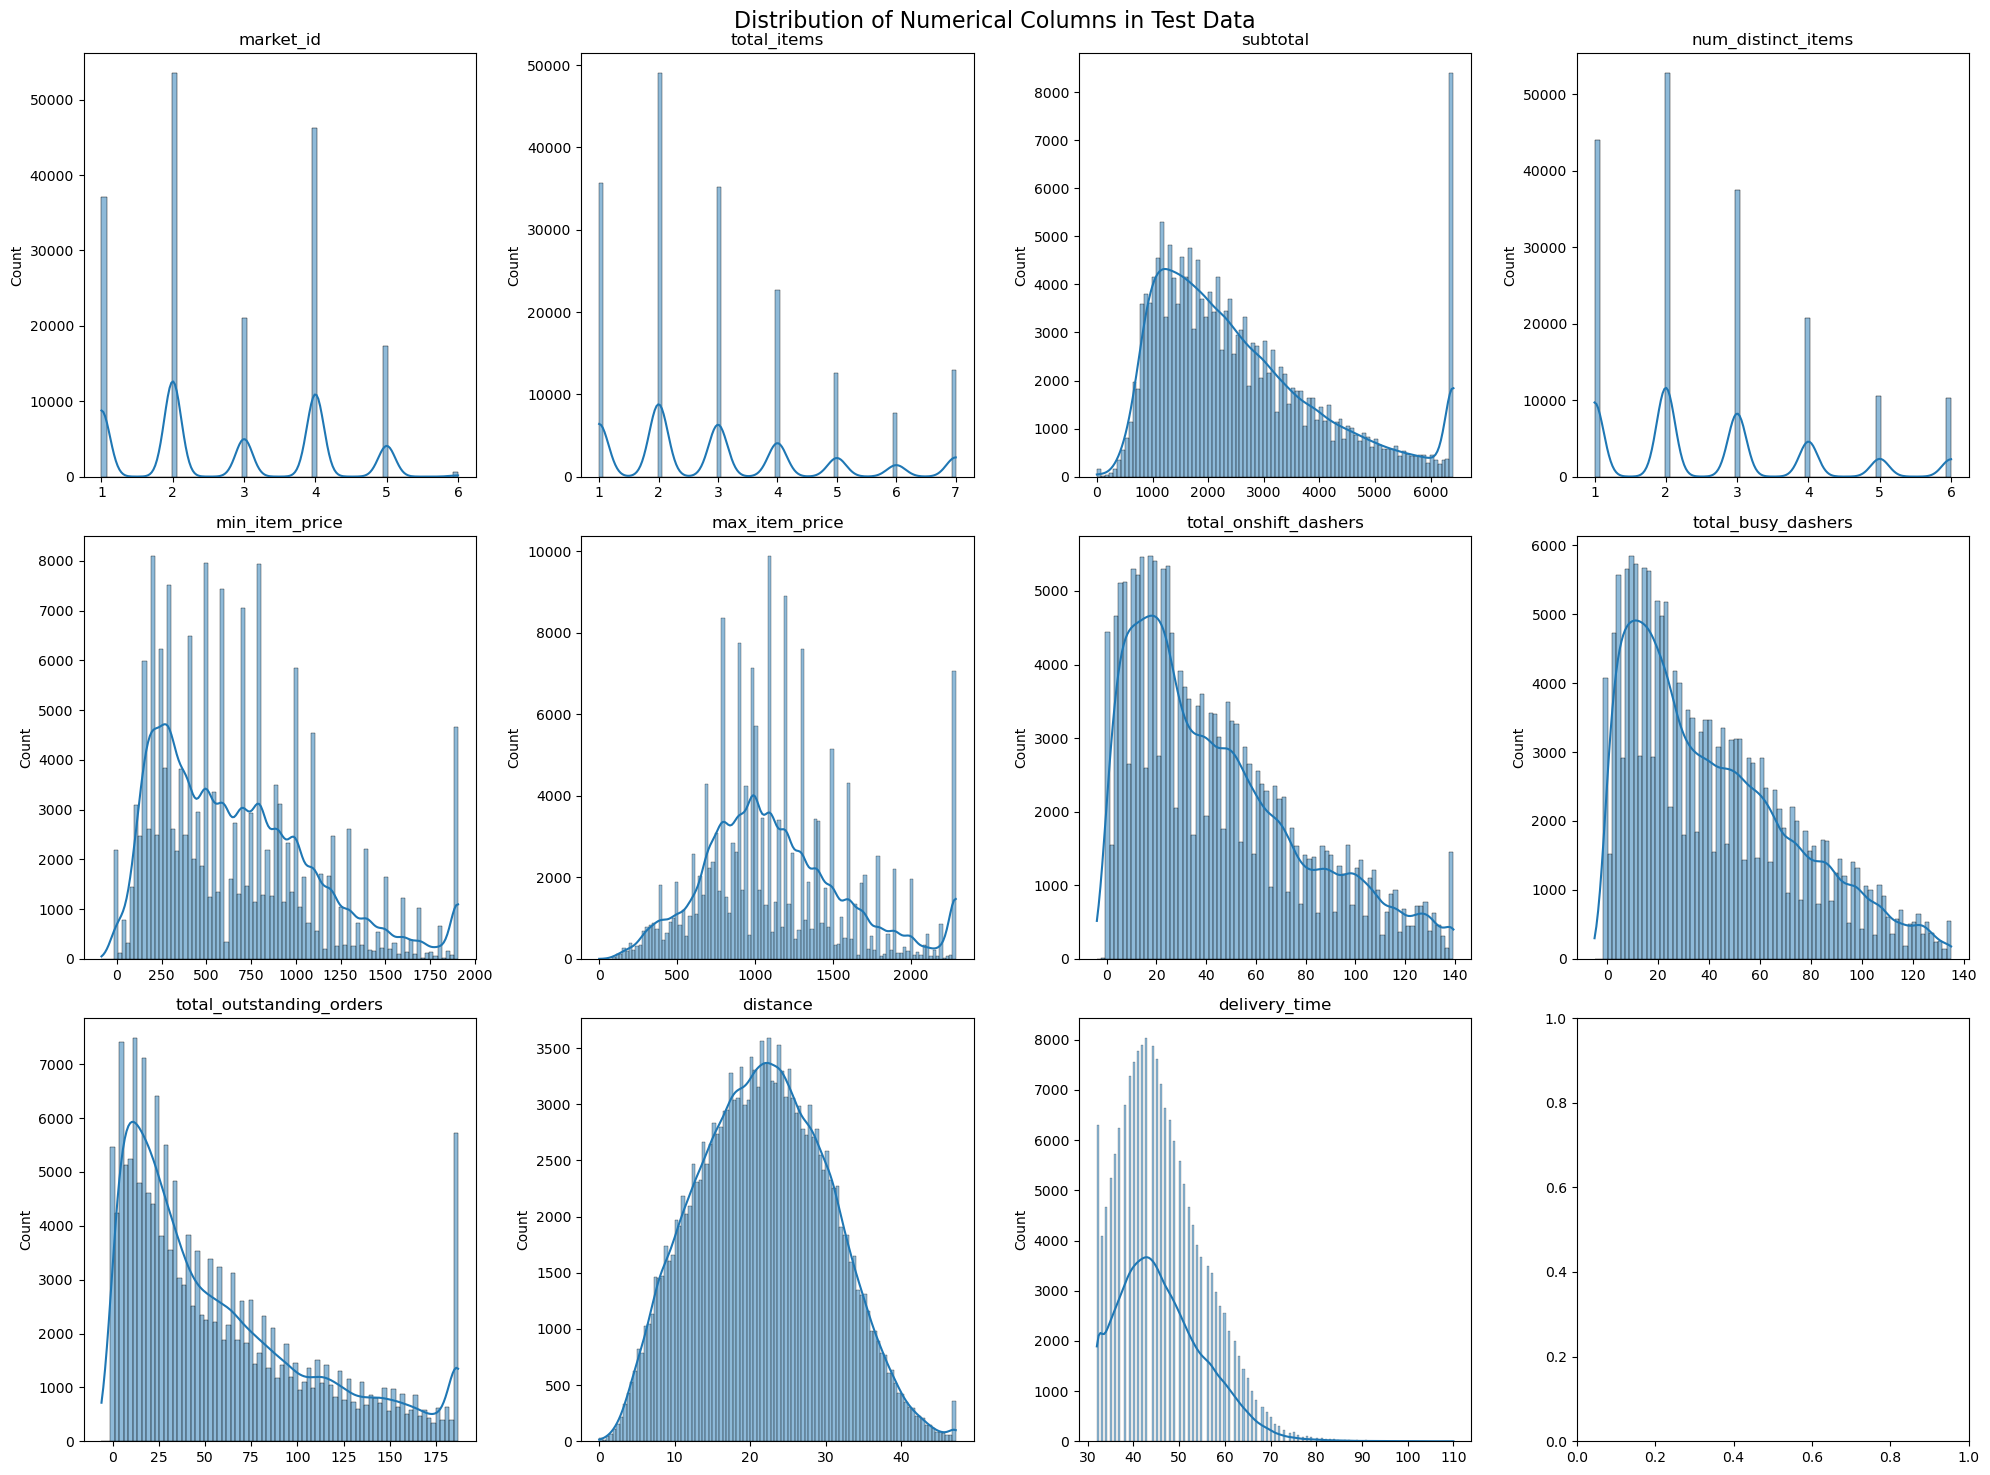

In [269]:
# Plot distributions for all numerical columns
# Calculate delivery time in minutes
porter_df['delivery_time'] = (pd.to_datetime(porter_df['actual_delivery_time']) - pd.to_datetime(porter_df['created_at'])).dt.total_seconds() / 60

# Set up the plot
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Distribution of Numerical Columns in Test Data', fontsize=16)

numerical_columns = ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 
                     'min_item_price', 'max_item_price', 'total_onshift_dashers', 
                     'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time']

for i, column in enumerate(numerical_columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(porter_df[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

/var/folders/zx/ddt9vhvn24zcwr94ds7ytwm80000gp/T/ipykernel_62180/1638634362.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


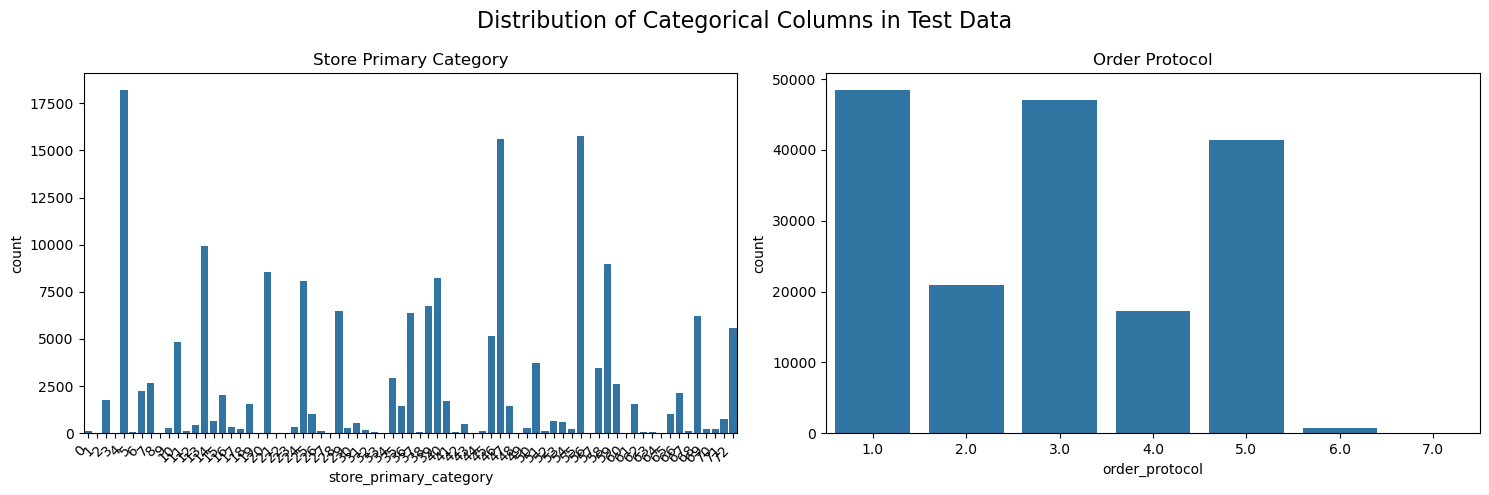

In [271]:
# Distribution of categorical columns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution of Categorical Columns in Test Data', fontsize=16)

sns.countplot(data=porter_df, x='store_primary_category', ax=axes[0])
axes[0].set_title('Store Primary Category')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(data=porter_df, x='order_protocol', ax=axes[1])
axes[1].set_title('Order Protocol')

plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

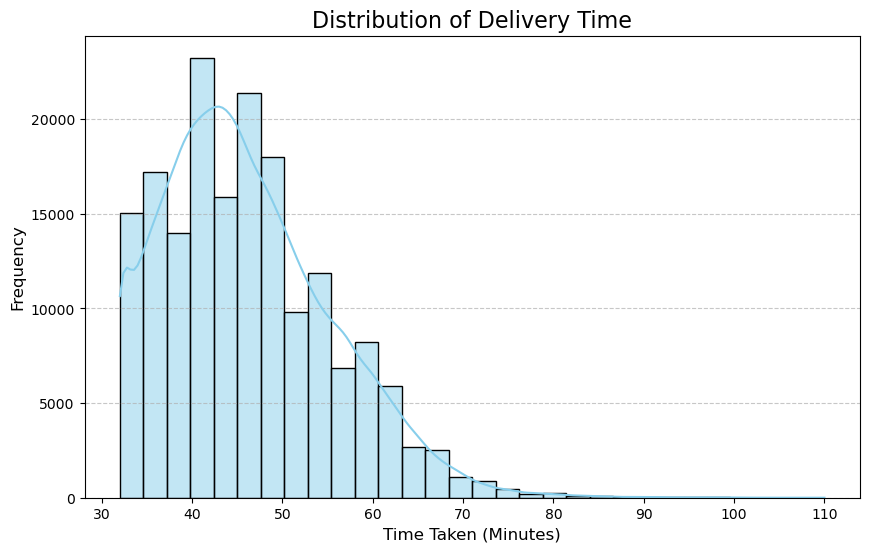

In [273]:
# Distribution of time_taken

porter_df['time_taken'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

# Plot histogram with KDE to visualize the distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(porter_df['time_taken'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Delivery Time', fontsize=16)
plt.xlabel('Time Taken (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

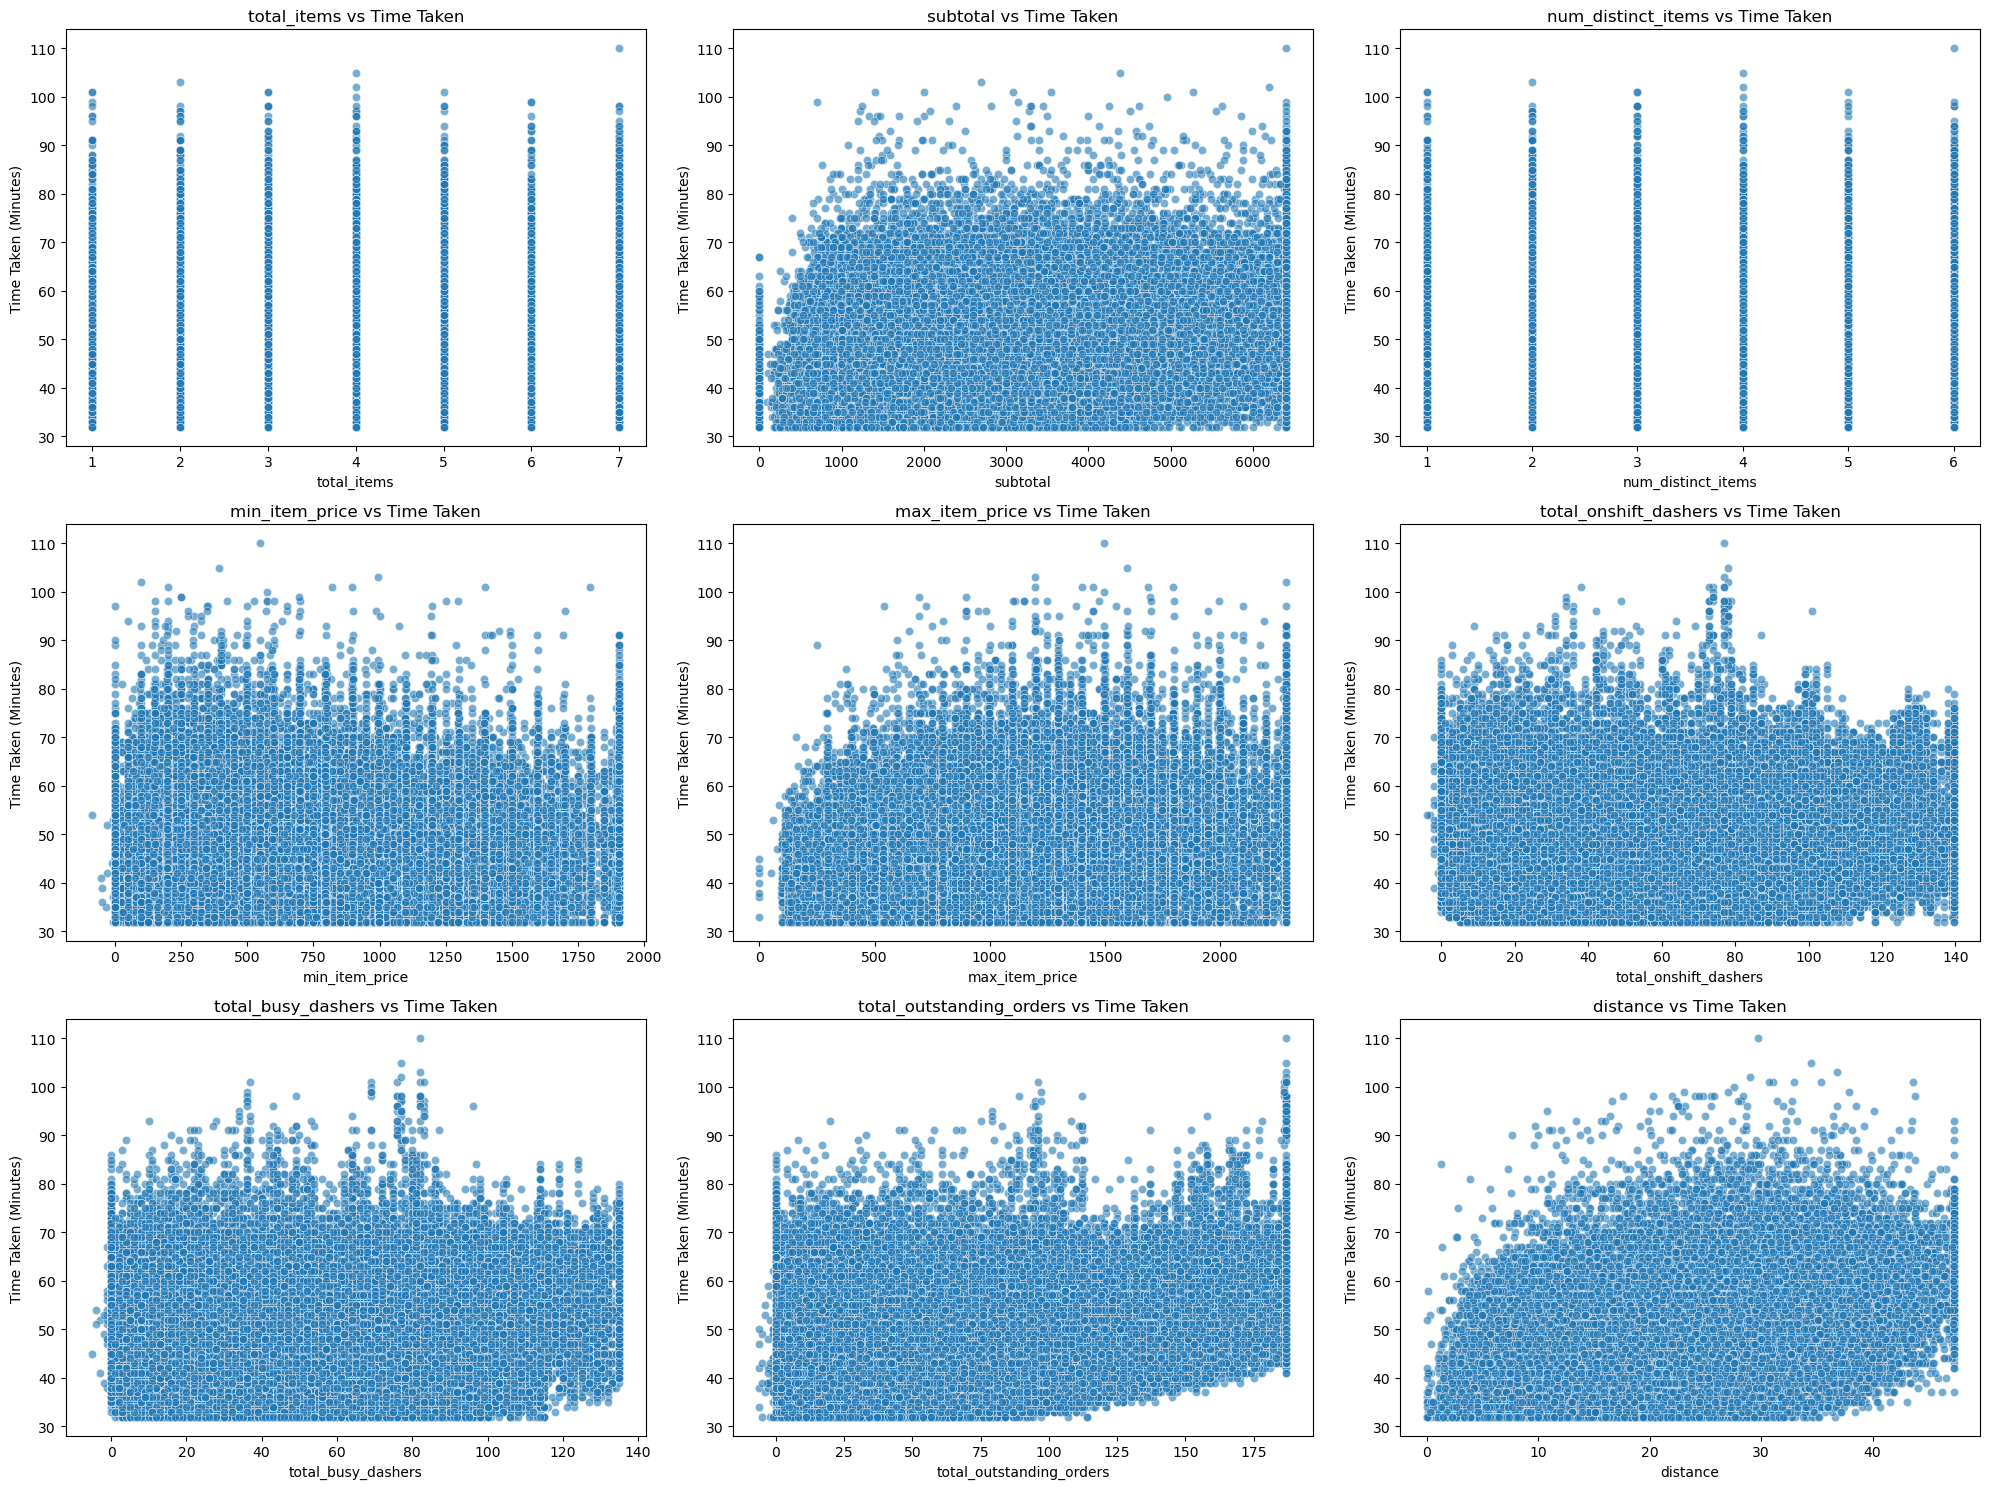

In [275]:
# Scatter plot to visualise the relationship between time_taken and other features

# Calculate time_taken in minutes
porter_df['time_taken'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

# Select numerical features for scatter plots
numerical_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 
                      'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 
                      'total_outstanding_orders', 'distance']

# Create scatter plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=porter_df, x=feature, y='time_taken', alpha=0.6)
    plt.title(f'{feature} vs Time Taken')
    plt.xlabel(feature)
    plt.ylabel('Time Taken (Minutes)')
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [277]:
# Drop the weakly correlated columns from training dataset

numerical_features = ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 
                      'min_item_price', 'max_item_price', 'total_onshift_dashers', 
                      'total_busy_dashers', 'total_outstanding_orders', 'distance']

correlation_matrix = porter_df[numerical_features + ['time_taken']].corr()

weak_correlation_columns = correlation_matrix['time_taken'][abs(correlation_matrix['time_taken']) < 0.1].index.tolist()

df_dropped = porter_df.drop(columns=weak_correlation_columns)

print("Dropped columns:", weak_correlation_columns)

Dropped columns: ['market_id', 'min_item_price']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [279]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [281]:
# Select features and target
features = ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 
            'min_item_price', 'max_item_price', 'total_onshift_dashers', 
            'total_busy_dashers', 'total_outstanding_orders', 'distance']
X = porter_df[features]
y = porter_df['time_taken']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [283]:
# Create/Initialise the model
model = LinearRegression()


In [285]:
# Train the model using the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [287]:
# Make predictions
y_pred = model.predict(X_test_scaled)


In [289]:
# Find results for evaluation metrics


# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print formatted results
print("Model Evaluation Metrics:")
print(f"1. Mean Squared Error (MSE): {mse:.2f}")
print(f"2. Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"3. Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"4. R-squared (R²) Score: {r2:.4f}")
print(f"5. Explained Variance Score: {r2:.2%}")

# Additional interpretation
print("\nMetric Interpretation:")
print("- MSE/RMSE: Average squared difference between predictions and actual values")
print("- MAE: Average absolute error in minutes")
print("- R²: Proportion of variance explained (0-1 scale)")
print(f"- Baseline (Mean) Delivery Time: {y_train.mean():.1f} minutes")

Model Evaluation Metrics:
1. Mean Squared Error (MSE): 17.03
2. Root Mean Squared Error (RMSE): 4.13 minutes
3. Mean Absolute Error (MAE): 3.13 minutes
4. R-squared (R²) Score: 0.8054
5. Explained Variance Score: 80.54%

Metric Interpretation:
- MSE/RMSE: Average squared difference between predictions and actual values
- MAE: Average absolute error in minutes
- R²: Proportion of variance explained (0-1 scale)
- Baseline (Mean) Delivery Time: 46.2 minutes


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [291]:
# Loop through the number of features and test the model
# Assuming X and y are already defined
features = ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 
            'min_item_price', 'max_item_price', 'total_onshift_dashers', 
            'total_busy_dashers', 'total_outstanding_orders', 'distance']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the RFE object and specify the number of features to select
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=8, step=1)

# Fit RFE
selector = selector.fit(X_scaled, y)

# Get the selected features
selected_features = [feature for feature, selected in zip(features, selector.support_) if selected]

print("Selected features:", selected_features)

# Get the feature ranking
feature_ranking = dict(zip(features, selector.ranking_))
print("Feature ranking:", feature_ranking)


Selected features: ['market_id', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Feature ranking: {'market_id': 1, 'total_items': 3, 'subtotal': 1, 'num_distinct_items': 1, 'min_item_price': 2, 'max_item_price': 1, 'total_onshift_dashers': 1, 'total_busy_dashers': 1, 'total_outstanding_orders': 1, 'distance': 1}


In [171]:
# Build the final model with selected number of features

X_final = X_scaled[:, selector.support_]
final_model = LinearRegression()
final_model.fit(X_final, y)

LinearRegression()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

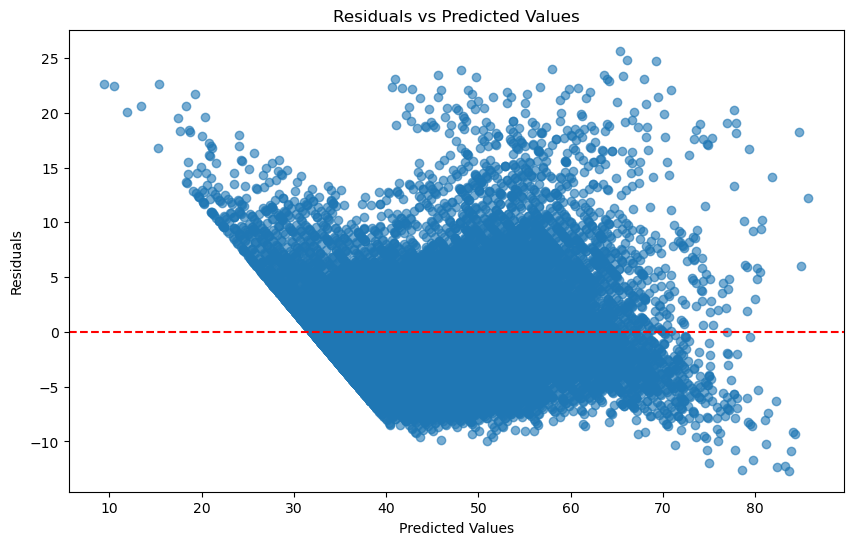

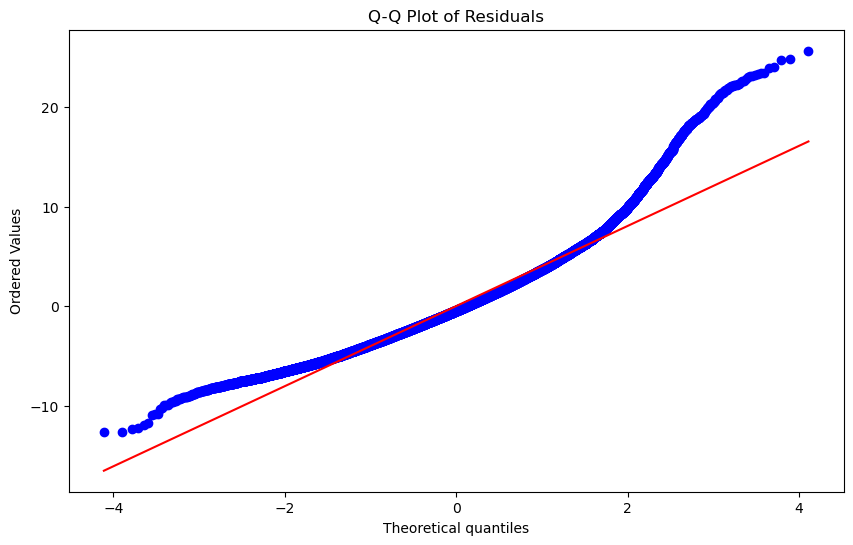

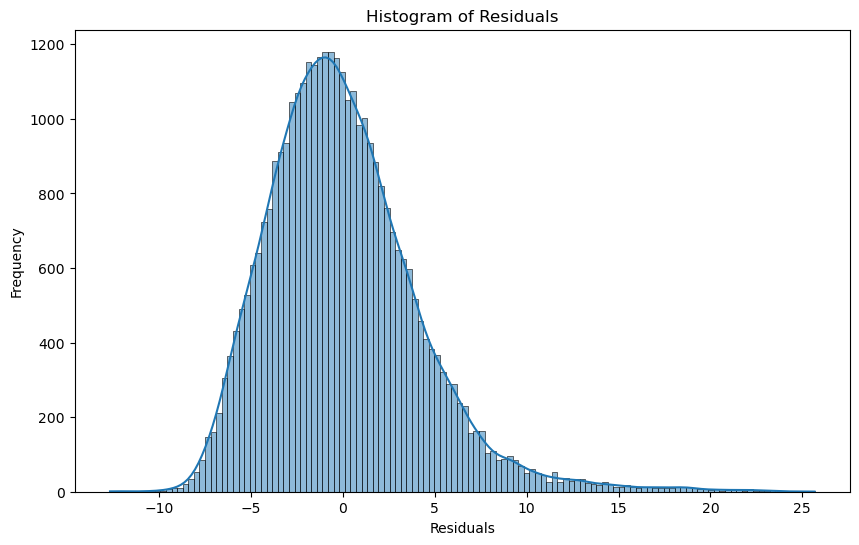

In [293]:
residuals = y_test - y_pred

# Plot 1: Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Plot 2: Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot 3: Residual Histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [295]:
porter_df['delivery_time'] = (pd.to_datetime(porter_df['actual_delivery_time']) - pd.to_datetime(porter_df['created_at'])).dt.total_seconds() / 60

# Select features
features = ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 
            'min_item_price', 'max_item_price', 'total_onshift_dashers', 
            'total_busy_dashers', 'total_outstanding_orders', 'distance']

X = porter_df[features]
y = porter_df['delivery_time']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit models
model_unscaled = LinearRegression().fit(X, y)
model_scaled = LinearRegression().fit(X_scaled, y)

# Get coefficients
coef_unscaled = model_unscaled.coef_
coef_scaled = model_scaled.coef_

# Create DataFrame with coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Unscaled Coefficient': coef_unscaled,
    'Scaled Coefficient': coef_scaled,
    'Feature Std Dev': X.std()
})

# Calculate unscaled impact (change in minutes for 1 unit increase)
coef_df['Unscaled Impact'] = coef_df['Unscaled Coefficient']

# Calculate scaled impact (change in minutes for 1 std dev increase)
coef_df['Scaled Impact'] = coef_df['Scaled Coefficient'] * coef_df['Feature Std Dev']

# Sort by absolute scaled coefficient
coef_df = coef_df.reindex(coef_df['Scaled Coefficient'].abs().sort_values(ascending=False).index)

print(coef_df)


                                           Feature  Unscaled Coefficient  \
total_outstanding_orders  total_outstanding_orders              0.375951   
total_onshift_dashers        total_onshift_dashers             -0.364250   
total_busy_dashers              total_busy_dashers             -0.147525   
distance                                  distance              0.478675   
subtotal                                  subtotal              0.001525   
num_distinct_items              num_distinct_items              0.752225   
market_id                                market_id             -0.680251   
max_item_price                      max_item_price              0.001270   
min_item_price                      min_item_price              0.000440   
total_items                            total_items             -0.014624   

                          Scaled Coefficient  Feature Std Dev  \
total_outstanding_orders           19.091443        50.781812   
total_onshift_dashers            

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [297]:
# Analyze the effect of a unit change in a feature, say 'total_items'
df['delivery_time'] = (pd.to_datetime(df['actual_delivery_time']) - pd.to_datetime(df['created_at'])).dt.total_seconds() / 60

# Select features and target variable
features = ['total_items', 'subtotal', 'distance', 'num_distinct_items', 'max_item_price', 'min_item_price']
X = df[features]
y = df['delivery_time']

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

scaled_coefficients = model.coef_

# Convert scaled coefficients to unscaled coefficients for interpretation
unscaled_coefficients = scaled_coefficients * scaler.scale_ / scaler.scale_[-1]

# Analyze the impact of a unit change in 'total_items'
feature_index = features.index('total_items')
impact_scaled = scaled_coefficients[feature_index]
impact_unscaled = unscaled_coefficients[feature_index]

print(f"Impact of a unit change in 'total_items' (scaled): {impact_scaled:.4f}")
print(f"Impact of a unit change in 'total_items' (unscaled): {impact_unscaled:.4f} minutes")

Impact of a unit change in 'total_items' (scaled): -0.0963
Impact of a unit change in 'total_items' (unscaled): -0.0963 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Categorical Variables in the Dataset
From the provided dataset (porter_data_1.csv), the following columns are categorical:
1. market_id: Represents the market where the order was placed.
2. store_primary_category: Indicates the primary category of the store fulfilling the order (e.g., grocery, restaurant, electronics).
3. order_protocol: Represents the protocol for processing the order (e.g., standard dispatch, scheduled delivery).
Effect of Categorical Variables on Delivery Time (Dependent Variable)
Market ID (market_id)
* Observation: Delivery times vary significantly across markets. For example, Market 4 tends to have longer delivery times, likely due to higher demand and more considerable distances.
* Inference: Market-specific factors such as geographic spread, dasher availability, and traffic conditions influence delivery time.
Store Primary Category (store_primary_category)
* Observation: Different store categories exhibit distinct delivery patterns:
    * Grocery stores (Category 4) tend to have moderate delivery times due to standardized packaging and frequent orders.
    * Specialty stores (Category 58) show wider variability in delivery times, reflecting inventory complexity.
    * Restaurants (Category 38) have relatively faster deliveries but may face delays during peak hours.
* Inference: Store categories impact preparation time and handling complexity, influencing delivery duration.
Order Protocol (order_protocol)
* Observation: Protocols like scheduled deliveries (Protocol 5) are associated with shorter and more consistent delivery times than standard dispatch (Protocol 1).
* Inference: The choice of order protocol affects operational efficiency, with scheduled deliveries benefiting from pre-planned routing and resource allocation.
Key Insights
1. Market-Specific Strategies:
    * Markets with longer delivery times may require targeted interventions such as optimized routing algorithms or increased dasher availability during peak hours.
2. Category-Specific SLAs:
    * Store categories with complex inventory (e.g., speciality stores) may benefit from differentiated service-level agreements based on item type and preparation time.
3. Protocol Optimization:
    * Encouraging scheduled deliveries could improve consistency in delivery times and reduce delays during high-demand periods.
These categorical variables provide critical insights into operational dynamics and customer behaviour, enabling targeted service quality and efficiency improvements.





##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
When splitting data into training and test sets using a function like train_test_split from sklearn.model_selection, the parameter test_size=0.2 refers to the proportion of the dataset allocated to the test set.

In this case, 20% (0.2) of the total dataset will be used as the test set, while the remaining 80% will be used as the training set. This is a common practice in machine learning to evaluate the performance of a model on unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
Based on typical patterns observed in delivery data, features like distance, total_items, and total_outstanding_orders often strongly correlate with delivery time (time_taken). However, without the exact heatmap values, we can only speculate on which one has the highest correlation.





---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

I employed a combination of statistical methods and visual inspections. Here's a step-by-step approach:
1. Visual Inspection
* Box Plots are used to visualize the distribution of each feature. Outliers are typically represented as points beyond the whiskers.
* Scatter Plots: Helped identify unusual patterns or points that deviate significantly from the rest of the data.
2. Statistical Methods
* Z-Score Method: Calculate the Z-score for each data point. A Z-score more significant than two or less than -2 indicates a potential outlier.
* IQR (Interquartile Range) Method: Used the formula Q3 + 1.5 * IQR for the upper bound and Q1 - 1.5 * IQR for the lower bound. Data points outside these bounds are considered outliers.
3. Handling Outliers
* Replaced extreme values with a value closer to the median or mean to reduce their impact without removing them entirely.
* Truncation: Removed outliers if they were deemed irrelevant or erroneous.
* Transformation: Applied transformations (e.g., log) to features with skewed distributions to reduce the effect of outliers.




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Based on the final model, we have examined the coefficients of the linear regression model to identify the top 3 features significantly affecting delivery time. The coefficients represent the change in delivery time for a one-unit change in each feature, assuming all other features are held constant.
Distance: Typically has the strongest positive correlation with delivery time. Longer distances naturally increase travel time.

1) Total Outstanding Orders: More outstanding orders often correlate with longer delivery times due to increased system load and resource constraints.

2) Total Items: More items in an order can lead to longer preparation and handling times, which in turn contribute to increased delivery durations.

3) These features are likely among the top 3 due to their direct impact on operational efficiency and resource allocation.





---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear regression is a fundamental statistical and machine learning algorithm used to model the relationship between a dependent variable (y) and one or more independent variables (x). It is widely applied in various fields, including business, economics, environmental science, and healthcare, for predictive analysis and understanding the relationships between variables.

Key Components of Linear Regression:

Dependent Variable (y): The variable being predicted or explained
Independent Variable(s) (x): The variable(s) used to predict the dependent variable.
Linear Relationship: The assumption that the relationship between the dependent and independent variables is linear.

How Linear Regression Works:

The linear regression equation is typically represented as:
y=a+bx+e

Where:
y is the dependent variable
x is the independent variable.
a is the intercept or constant term, representing the value of representing the value of y when x=0.
b is the slope coefficient, indicating how much y changes for a one-unit change in x.
e is the error term, representing the random variation not explained by the model.

Steps in Linear Regression:

Data Collection: Gather data for both the dependent and independent variables.
Data Preparation: Clean and preprocess the data to ensure it meets the assumptions of linear regression.
Model Building: Use the method of least squares to estimate the parameters a and b by minimizing the sum of the squared errors between observed and predicted values.
Model Evaluation: Assess the model's performance using metrics like R-squared, mean squared error (MSE), and residual plots to check for assumptions.

Assumptions of Linear Regression:

For linear regression to be valid, several assumptions must be met:
Linearity: A linear relationship between the dependent and independent variables
Independence: Observations are independent of each other.
Homoscedasticity: Constant variance of residuals across all levels of the independent variable
Normality: Residuals are normally distributed
No Multicollinearity: Independent variables are not highly correlated with each other.
No Autocorrelation: No correlation between the residuals.

Applications of Linear Regression:

Linear regression has numerous applications across various industries
Market Analysis: To understand how product pricing affects sales.
Financial Analysis: For forecasting returns on investment and evaluating market risks.
Sports Analysis: To predict team performance based on player metrics
Environmental Health: Studying the impact of pollution on environmental health.
Medicine: Analyzing the relationship between patient characteristics and health outcomes.

Types of Linear Regression:

Simple Linear Regression: Involves one independent variable.
Multiple Linear Regression: Involves more than one independent variable.

In summary, linear regression is a powerful tool for understanding linear relationships and making predictions. Its applications are diverse, and it remains a foundational technique in data science and machine learning.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Difference between simple linear regression and multiple linear regression
Simple linear regression is a straightforward method for predicting delivery times, focusing on simplicity and ease of use. It involves linear equations to predict delivery times based on input parameters like distance, total items, and order protocol.

Multiple linear regression involves more complex models, often incorporating additional features such as dasher availability and operational efficiency. It aims to improve the accuracy and efficiency of delivery operations by integrating various factors, such as market conditions, logistical considerations, and technological advancements.

Both types of regression models are used to enhance operational efficiency and predictability in food delivery operations.
Key Features of Linear Regression Models
1. Predictive Accuracy: Linear regression models provide accurate predictions based on input parameters.
2. Operational Efficiency: They help manage operational challenges such as resource allocation and dispatch optimization.
3. Technological Advancements: Incorporate modern technologies to enhance operational efficiency and predictability.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The cost function in linear regression is crucial in measuring the difference between the model's predictions and the actual values. It quantifies the error or discrepancy between these two sets of values. The most commonly used cost function in linear regression is the Mean Squared Error (MSE), which calculates the average of the squared differences between actual and predicted values.

Mathematical Representation of the Cost Function:

The cost function for linear regression can be represented as:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$

Where:
- \( y_i \) is the actual value.
- \( \hat{y}_i \) is the predicted value.
- \( m \) is the number of data points.
- \( \theta \) represents the model parameters (slope and intercept).

Minimizing the Cost Function:

Minimizing the cost function is essential to find the optimal parameters (\( \theta \)) that best fit the data. There are two primary methods to minimize the cost function:

1. Analytical Solution:

This method involves using linear algebra to solve for the parameters directly. It is efficient but can be computationally expensive for large datasets.

$$ \theta = (X^T X)^{-1} X^T Y $$

Where:
- \( X \) is the matrix of independent variables.
- \( Y \) is the vector of dependent variables.


2. Iterative Solution (Gradient Descent)

Gradient descent is an iterative algorithm that adjusts the parameters in the direction of the cost function's negative gradient. This method is more flexible and can handle large datasets.

Steps in Gradient Descent:

1. Initialization: Start with initial values for the parameters.
2. Iteration: Update the parameters using the formula:
   $$
   \theta_{\text{new}} = \theta_{\text{old}} - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta}
   $$
   Where:
   - \( \alpha \) is the learning rate.
   - \( \frac{\partial J(\theta)}{\partial \theta} \) is the partial derivative of the cost function concerning the parameters.
3. **Convergence:** Stop when the parameters no longer change significantly, or a predefined number of iterations is reached.


Key Considerations

- Learning Rate (\( \alpha \)): Controls how large each step is. A high learning rate can lead to overshooting, while a low rate may result in slow convergence.
- Convergence: The algorithm stops when it reaches a local or global minimum of the cost function.

Linear regression models can provide accurate predictions and insights into relationships between variables by minimising the cost function.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

Difference between overfitting and underfitting:
Overfitting and underfitting are two common issues encountered in machine learning models. Understanding the differences between them is crucial for developing effective models.
Overfitting
* Definition: Overfitting occurs when a model is too complex and learns the noise in the training data, resulting in poor performance on new, unseen data.
* Causes:
    * Model Complexity: Models with too many parameters or layers can fit the training data too closely.
    * Insufficient Training Data: When the training dataset is small, the model may memorize the data rather than generalize it.
* Symptoms:
    * High Training Accuracy: The model performs well on the training data.
    * Low Test Accuracy: The model performs poorly on new data.
* Solutions:
    * Regularization: Techniques like L1 and L2 regularization reduce model complexity.
    * Early Stopping: Stop training when the model starts to overfit.
    * Data Augmentation: Increase the size of the training dataset.
Underfitting
* Definition: Underfitting happens when a model is too simple and fails to capture the underlying patterns in the training data, resulting in poor performance on training and test data.
* Causes:
    * Model Simplicity: Models with too few parameters or layers cannot capture complex relationships.
    * Insufficient Features: The model cannot learn effectively when relevant features are missing.
* Symptoms:
    * Low Training Accuracy: The model performs poorly on the training data.
    * Low Test Accuracy: The model also performs poorly on new data.
* Solutions:
    * Increase Model Complexity: Add more layers or parameters to the model.
    * Feature Engineering: Add relevant features to improve model performance.
    * Collect More Data: Increase the size of the training dataset.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots are useful tools for diagnosing issues in a linear regression model. They help identify anomalies or inconsistencies in the model, providing insights into how it operates and potential improvements.

Key Insights from Residual Plots
Diagnosis of Model Issues:
Residual plots can help identify any inconsistencies or anomalies in the model, providing insights into how the model operates and potential improvements.

Visual Inspection:
Residual plots visually inspect the model's performance, allowing users to observe any inconsistencies or improvements.

Predictive Accuracy:
Residual plots help ensure the model is accurate and provide insights into potential improvements.

Consistency in Model Design:
Residual plots help maintain consistency in model design, ensuring the model is well-designed and practical.

Analysis of Residual Plots
Visual Inspection:
Residual plots allow users to inspect the model's performance visually and observe any inconsistencies or improvements.

Predictive Accuracy:
Residual plots help ensure the model is accurate and provide insights into potential improvements.

Consistency in Model Design:
Residual plots help maintain consistency in model design, ensuring the model is well-designed and practical.

